<a href="https://colab.research.google.com/github/Satvik256/TestRepo/blob/master/Masks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from fastai.vision import*

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
doc(ImageDataBunch)

In [0]:
path=Path('/content/drive/My Drive/masks_data')

In [0]:
np.random.seed(42)
data=ImageDataBunch.from_folder(path,train='.',valid_pct=0.2,ds_tfms=get_transforms(),size=224,num_workers=4).normalize(imagenet_stats)

In [6]:
data.classes

['masks', 'no_masks']

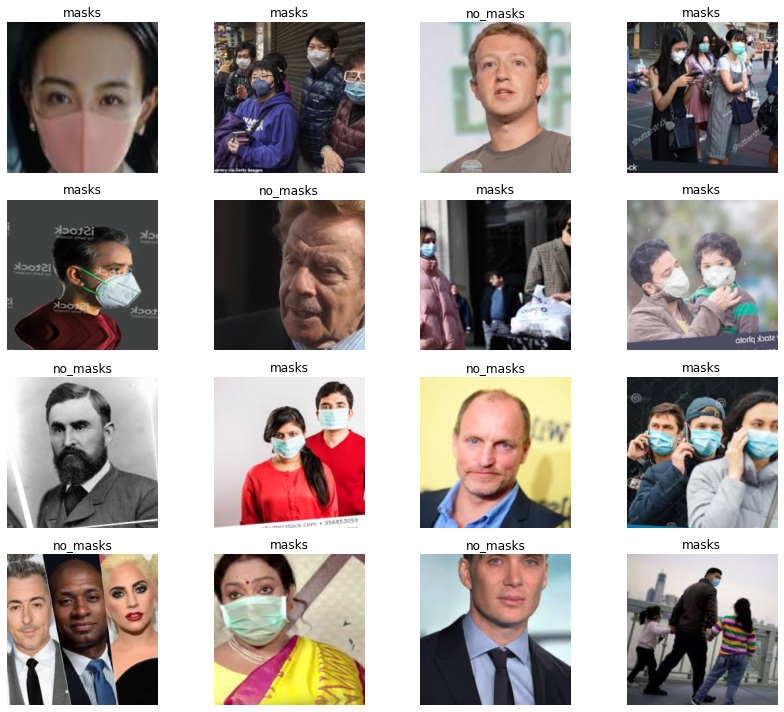

In [7]:
data.show_batch(rows=4,figsize=(12,10))

In [8]:
data.classes,data.c,len(data.train_ds),len(data.valid_ds)

(['masks', 'no_masks'], 2, 436, 108)

In [9]:
learn=cnn_learner(data,models.resnet34,metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [10]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.899812,0.453300,0.092593,03:22
1,0.509810,0.138815,0.037037,00:42
2,0.345266,0.114890,0.037037,00:05
3,0.268774,0.109245,0.037037,00:05


In [11]:
interpret=ClassificationInterpretation.from_learner(learn)

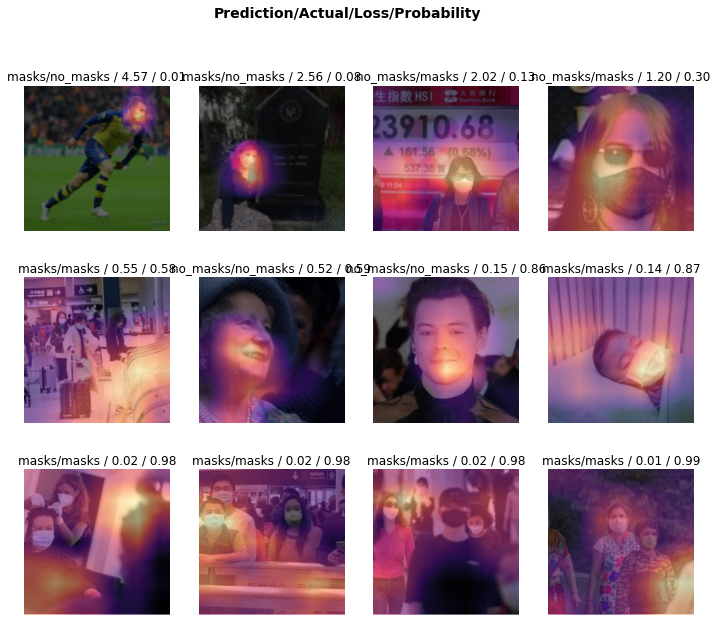

In [15]:
interpret.plot_top_losses(12,figsize=(12,10),heatmap=True)

In [0]:
learn.save('stage-1')

In [0]:
learn.unfreeze()

In [18]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


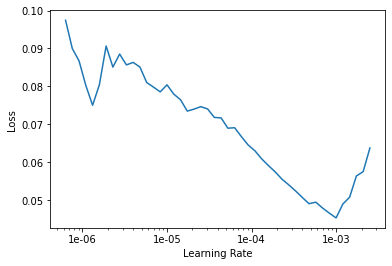

In [19]:
learn.recorder.plot()

In [23]:
learn.fit_one_cycle(4,max_lr=slice(1e-5,1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.028547,0.086990,0.018519,00:06
1,0.015888,0.103530,0.009259,00:06
2,0.022300,0.112465,0.009259,00:06
3,0.024366,0.108989,0.009259,00:06


In [0]:
learn.save('stage-2')

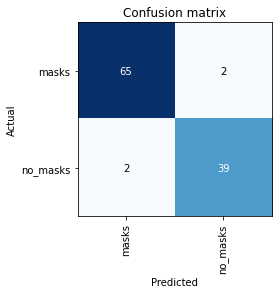

In [41]:
interpret.plot_confusion_matrix()

In [42]:
learn2.lr_find(start_lr=1e-5, end_lr=1e-1)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


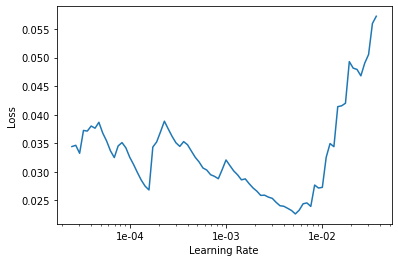

In [43]:
learn2.recorder.plot()

In [45]:
learn2.fit_one_cycle(5,max_lr=slice(1e-4,1e-2))

epoch,train_loss,valid_loss,error_rate,time
0,0.009339,0.035479,0.018519,00:07
1,0.023130,0.071200,0.027778,00:07
2,0.034839,0.010188,0.009259,00:07
3,0.037564,0.008082,0.000000,00:07
4,0.039481,0.006247,0.000000,00:07


In [48]:
interpret2=ClassificationInterpretation.from_learner(learn2)

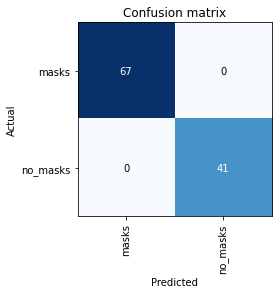

In [50]:
interpret2.plot_confusion_matrix()

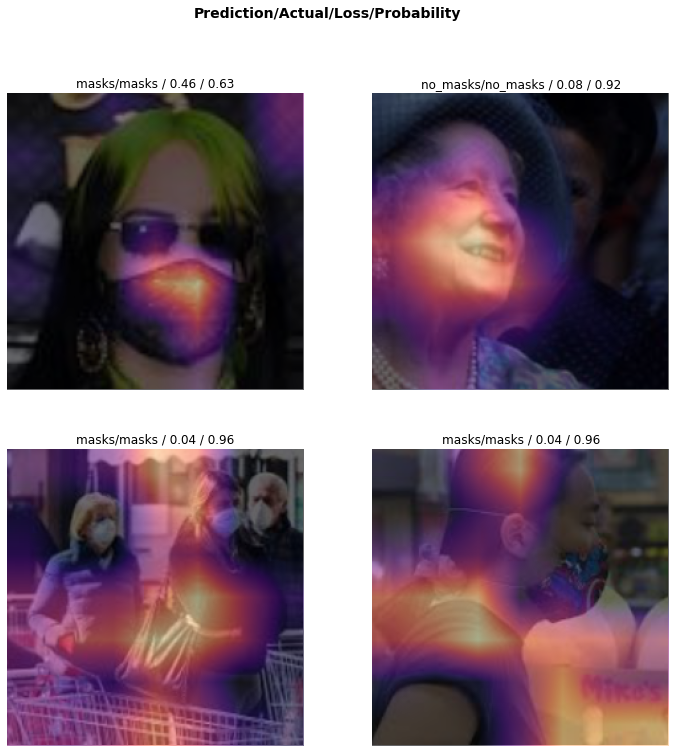

In [54]:
interpret2.plot_top_losses(4,heatmap=True)

In [0]:
learn2.save('stage-2')